# 

In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlrose_hiive import NNGSRunner

from multiprocessing import Pool

# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X_df = statlog_vehicle_silhouettes.data.features 
y_df = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
#print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
#print(statlog_vehicle_silhouettes.variables) 

print(X_df)
print(y_df)

print('Classes')
print(y_df.groupby(['class'])['class'].count())

label_encoder = LabelEncoder()
y_df['class'] = label_encoder.fit_transform(y_df['class'])
y_df.info()

print('Classes')
print(y_df.groupby(['class'])['class'].count())

data_df = pd.concat([X_df, y_df], axis=1)

nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

data_df.dropna(inplace=True)
data_df = data_df[data_df['class'] != 0]

data_df.reset_index(drop=True,inplace=True)

print(data_df.groupby(['class'])['class'].count())

data_df['class'].values[data_df['class'].values != 2] = 0
data_df['class'].values[data_df['class'].values == 2] = 1

print(data_df.groupby(['class'])['class'].count())

# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)

# Standardize data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Shuffle training data and then split into training and validation set 
X_train, X_vld, y_train, y_vld = train_test_split(X_train_full, y_train_full, test_size = 0.2, shuffle = True, random_state = 1988, 
                                                    stratify = y_train_full)

     COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0           95.0           48                    83           178   
1           91.0           41                    84           141   
2          104.0           50                   106           209   
3           93.0           41                    82           159   
4           85.0           44                    70           205   
..           ...          ...                   ...           ...   
841         93.0           39                    87           183   
842         89.0           46                    84           163   
843        106.0           54                   101           222   
844         86.0           36                    78           146   
845         85.0           36                    66           123   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0                      72                       10            162   
1                      57        

In [7]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [10]
mutation_prob_list = [0.1]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr_pop10'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_ga_clbr_pop10 = fitcrv

Done!


In [8]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [100]
mutation_prob_list = [0.1]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr_pop100'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_ga_clbr_pop100 = fitcrv

Done!


In [9]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [1000]
mutation_prob_list = [0.1]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr_pop1000'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_ga_clbr_pop1000 = fitcrv

Done!


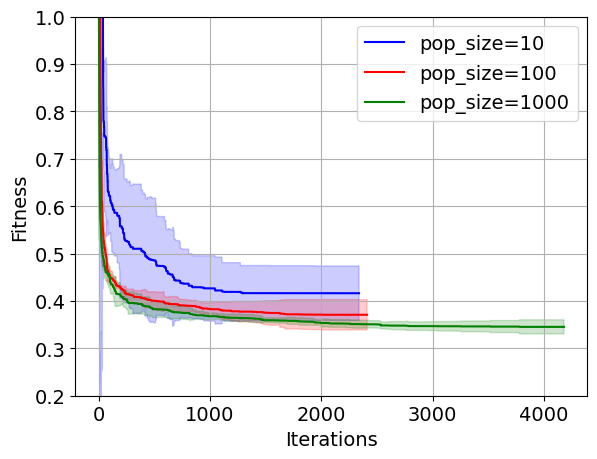

In [19]:
fitcrv_ga_clbr_pop10   = pd.read_csv('fitcrv_ga_clbr_pop10.csv')  
fitcrv_ga_clbr_pop100  = pd.read_csv('fitcrv_ga_clbr_pop100.csv')  
fitcrv_ga_clbr_pop1000 = pd.read_csv('fitcrv_ga_clbr_pop1000.csv')  


fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(fitcrv_ga_clbr_pop10.shape[0]), fitcrv_ga_clbr_pop10['mean'], label='pop_size=10', color='b')
ax.fill_between(range(fitcrv_ga_clbr_pop10.shape[0]), fitcrv_ga_clbr_pop10['mean'] - 2*fitcrv_ga_clbr_pop10['std'], 
                                                      fitcrv_ga_clbr_pop10['mean'] + 2*fitcrv_ga_clbr_pop10['std'], alpha=0.2, color='b')

ax.plot(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'], label='pop_size=100', color='r')
ax.fill_between(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'] - 2*fitcrv_ga_clbr_pop100['std'], 
                                                       fitcrv_ga_clbr_pop100['mean'] + 2*fitcrv_ga_clbr_pop100['std'], alpha=0.2, color='r')

ax.plot(range(fitcrv_ga_clbr_pop1000.shape[0]), fitcrv_ga_clbr_pop1000['mean'], label='pop_size=1000', color='g')
ax.fill_between(range(fitcrv_ga_clbr_pop1000.shape[0]), fitcrv_ga_clbr_pop1000['mean'] - 2*fitcrv_ga_clbr_pop1000['std'], 
                                                        fitcrv_ga_clbr_pop1000['mean'] + 2*fitcrv_ga_clbr_pop1000['std'], alpha=0.2, color='g')

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
plt.close(fig)


In [16]:
#fitcrv_ga_clbr_pop10.to_csv('fitcrv_ga_clbr_pop10.csv', index=False)  
#fitcrv_ga_clbr_pop100.to_csv('fitcrv_ga_clbr_pop100.csv', index=False)  
#fitcrv_ga_clbr_pop1000.to_csv('fitcrv_ga_clbr_pop1000.csv', index=False)  

In [11]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [100]
mutation_prob_list = [0.3]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr_pop100_prob03'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_ga_clbr_pop100_prob03 = fitcrv

Done!


In [12]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [100]
mutation_prob_list = [0.5]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr_pop100_prob05'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_ga_clbr_pop100_prob05 = fitcrv

Done!


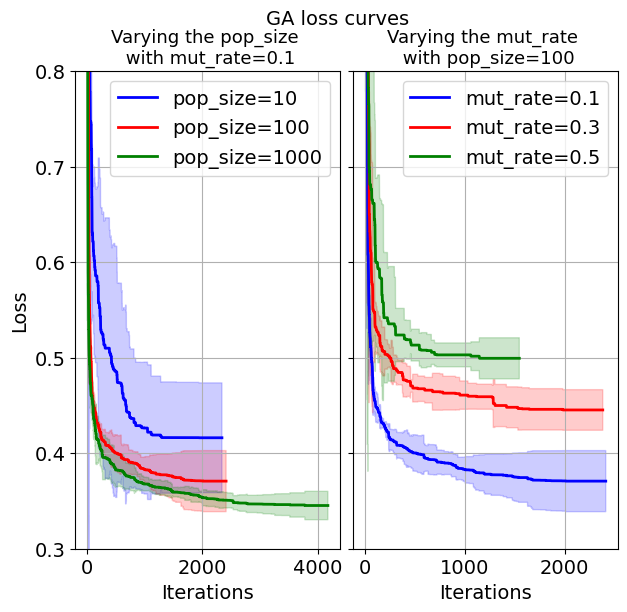

In [38]:
fitcrv_ga_clbr_pop100_prob03 = pd.read_csv('fitcrv_ga_clbr_pop100_prob03.csv')  
fitcrv_ga_clbr_pop100_prob05 = pd.read_csv('fitcrv_ga_clbr_pop100_prob05.csv') 
fitcrv_ga_clbr_pop10   = pd.read_csv('fitcrv_ga_clbr_pop10.csv')  
fitcrv_ga_clbr_pop100  = pd.read_csv('fitcrv_ga_clbr_pop100.csv')  
fitcrv_ga_clbr_pop1000 = pd.read_csv('fitcrv_ga_clbr_pop1000.csv')  


fontsize = 14
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 6.2))

ax1.plot(range(fitcrv_ga_clbr_pop10.shape[0]), fitcrv_ga_clbr_pop10['mean'], label='pop_size=10', color='b',linewidth=2)
ax1.fill_between(range(fitcrv_ga_clbr_pop10.shape[0]), fitcrv_ga_clbr_pop10['mean'] - 2*fitcrv_ga_clbr_pop10['std'], 
                                                      fitcrv_ga_clbr_pop10['mean'] + 2*fitcrv_ga_clbr_pop10['std'], alpha=0.2, color='b')

ax1.plot(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'], label='pop_size=100', color='r',linewidth=2)
ax1.fill_between(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'] - 2*fitcrv_ga_clbr_pop100['std'], 
                                                       fitcrv_ga_clbr_pop100['mean'] + 2*fitcrv_ga_clbr_pop100['std'], alpha=0.2, color='r')

ax1.plot(range(fitcrv_ga_clbr_pop1000.shape[0]), fitcrv_ga_clbr_pop1000['mean'], label='pop_size=1000', color='g',linewidth=2)
ax1.fill_between(range(fitcrv_ga_clbr_pop1000.shape[0]), fitcrv_ga_clbr_pop1000['mean'] - 2*fitcrv_ga_clbr_pop1000['std'], 
                                                        fitcrv_ga_clbr_pop1000['mean'] + 2*fitcrv_ga_clbr_pop1000['std'], alpha=0.2, color='g')

ax1.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)
ax1.set_title('Varying the pop_size \n with mut_rate=0.1', fontsize=13)
ax1.set_xlabel('Iterations', fontsize=fontsize) 
ax1.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax1.set_ylim(0.3, 0.8)
ax1.legend(fontsize=fontsize)
# Turn on the grid
ax1.grid(True)

ax2.plot(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'], label='mut_rate=0.1', color='b',linewidth=2)
ax2.fill_between(range(fitcrv_ga_clbr_pop100.shape[0]), fitcrv_ga_clbr_pop100['mean'] - 2*fitcrv_ga_clbr_pop100['std'], 
                                                       fitcrv_ga_clbr_pop100['mean'] + 2*fitcrv_ga_clbr_pop100['std'], alpha=0.2, color='b')

ax2.plot(range(fitcrv_ga_clbr_pop100_prob03.shape[0]), fitcrv_ga_clbr_pop100_prob03['mean'], label='mut_rate=0.3', color='r',linewidth=2)
ax2.fill_between(range(fitcrv_ga_clbr_pop100_prob03.shape[0]), fitcrv_ga_clbr_pop100_prob03['mean'] - 2*fitcrv_ga_clbr_pop100_prob03['std'], 
                                                              fitcrv_ga_clbr_pop100_prob03['mean'] + 2*fitcrv_ga_clbr_pop100_prob03['std'], 
                                                              alpha=0.2, color='r')

ax2.plot(range(fitcrv_ga_clbr_pop100_prob05.shape[0]), fitcrv_ga_clbr_pop100_prob05['mean'], label='mut_rate=0.5', color='g',linewidth=2)
ax2.fill_between(range(fitcrv_ga_clbr_pop100_prob05.shape[0]), fitcrv_ga_clbr_pop100_prob05['mean'] - 2*fitcrv_ga_clbr_pop100_prob05['std'], 
                                                              fitcrv_ga_clbr_pop100_prob05['mean'] + 2*fitcrv_ga_clbr_pop100_prob05['std'], 
                                                              alpha=0.2, color='g')

ax2.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)
ax2.set_title('Varying the mut_rate \n with pop_size=100', fontsize=13)
ax2.set_xlabel('Iterations', fontsize=fontsize) 
#ax2.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xlim(0, 8000)
#ax2.set_ylim(0.2, 1)
ax2.legend(fontsize=fontsize)
# Turn on the grid
ax2.grid(True)
fig.suptitle('GA loss curves', fontsize=fontsize) 
fig.subplots_adjust(wspace=0.05)
fig.savefig('ga_tuning_loss_curves.png')
plt.show()
plt.close(fig)


In [17]:
#fitcrv_ga_clbr_pop100_prob03.to_csv('fitcrv_ga_clbr_pop100_prob03.csv', index=False)  
#fitcrv_ga_clbr_pop100_prob05.toan adverse _csv('fitcrv_ga_clbr_pop100_prob05.csv', index=False)  

#### 1) Genetic Algorithm

In [15]:
from multiprocessing import Pool
import workers_ga

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
pop_size_list = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mutation_prob_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
max_iters = 5000
early_stopping = True
max_attempts = 400

output_file = 'ga_clbr'

parameters = []

for i, pop_size in enumerate(pop_size_list):
    for ii, mutation_prob in enumerate(mutation_prob_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for k, seed in enumerate(seed_list):
                
                parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train, y_train, X_vld, y_vld, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 22)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

Done!


In [12]:
# CAUTION do not overwrite the resutls file
# -----------------------------------------------------
df_ga_clbr = pd.read_csv('ga_clbr_results.txt', sep=' ')
df_mean_scores = df_ga_clbr.groupby(['pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts']).mean()
df_std_scores = df_ga_clbr.groupby(['pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts']).std()
df_mean_scores

seed  \
pop_size mutation_prob max_iters learning_rate early_stopping max_attempts         
50       0.0           5000      0.1           True           400            3.0   
         0.1           5000      0.1           True           400            3.0   
         0.2           5000      0.1           True           400            3.0   
         0.3           5000      0.1           True           400            3.0   
         0.4           5000      0.1           True           400            3.0   
...                                                                          ...   
1000     0.1           5000      0.1           True           400            3.0   
         0.2           5000      0.1           True           400            3.0   
         0.3           5000      0.1           True           400            3.0   
         0.4           5000      0.1           True           400            3.0   
         0.5           5000      0.1           True           400            3.0   

                                                                            auc_train  \
pop_size mutation_prob max_iters learning_rate early_stopping max_attempts              
50       0.0           5000      0.1           True           400            0.610562   
         0.1           5000      0.1           True           400            0.867232   
         0.2           5000      0.1           True           400            0.834439   
         0.3           5000      0.1           True           400            0.783443   
         0.4           5000      0.1           True           400            0.739828   
...                                                                               ...   
1000     0.1           5000      0.1           True           400            0.895767   
         0.2           5000      0.1           True           400            0.843108   
         0.3           5000      0.1           True           400            0.796368   
         0.4           5000      0.1           True           400            0.779223   
         0.5           5000      0.1           True           400            0.754793   

                                                                             auc_vld  \
pop_size mutation_prob max_iters learning_rate early_stopping max_attempts             
50       0.0           5000      0.1           True           400           0.645918   
         0.1           5000      0.1           True           400           0.845993   
         0.2           5000      0.1           True           400           0.838614   
         0.3           5000      0.1           True           400           0.826479   
         0.4           5000      0.1           True           400           0.741985   
...                                                                              ...   
1000     0.1           5000      0.1           True           400           0.861423   
         0.2           5000      0.1           True           400           0.849064   
         0.3           5000      0.1           True           400           0.784944   
         0.4           5000      0.1           True           400           0.765618   
         0.5           5000      0.1           True           400           0.790375   

                                                                            acc_train  \
pop_size mutation_prob max_iters learning_rate early_stopping max_attempts              
50       0.0           5000      0.1           True           400            0.702542   
         0.1           5000      0.1           True           400            0.789831   
         0.2           5000      0.1           True           400            0.767373   
         0.3           5000      0.1           True           400            0.762288   
         0.4           5000      0.1           True           400            0.745339   
...                                                      

In [13]:
pop_size_list = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mutation_prob_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

ga_clbr_array = np.zeros((df_mean_scores.values.shape[0], df_mean_scores.values.shape[1]+2))
ga_clbr_array_std = np.zeros((df_std_scores.values.shape[0], df_std_scores.values.shape[1]+2))

prob_column = mutation_prob_list * len(pop_size_list)
pop_column = []
for p in pop_size_list:
    pop_column = pop_column + [p]*len(mutation_prob_list)

ga_clbr_array[:, 0] = pop_column
ga_clbr_array[:, 1] = prob_column
ga_clbr_array[:,2:] = df_mean_scores.values

ga_clbr_array_std[:, 0] = pop_column
ga_clbr_array_std[:, 1] = prob_column
ga_clbr_array_std[:,2:] = df_std_scores.values

In [29]:
ga_clbr_array[ga_clbr_array[:, -1].argsort()]

array([[7.00000000e+02, 1.00000000e-01, 3.00000000e+00, 8.96940534e-01,
        8.78501873e-01, 8.13135593e-01, 7.93277311e-01, 5.32886861e-01,
        5.25045000e-01, 3.31438425e+03, 3.41524480e-01],
       [9.00000000e+02, 1.00000000e-01, 3.00000000e+00, 8.95803409e-01,
        8.49213483e-01, 8.15677966e-01, 7.73109244e-01, 5.57227729e-01,
        4.78199175e-01, 3.96157434e+03, 3.41771852e-01],
       [1.00000000e+03, 1.00000000e-01, 3.00000000e+00, 8.95767500e-01,
        8.61423221e-01, 7.97033898e-01, 7.66386555e-01, 4.34321891e-01,
        3.53067353e-01, 4.06346179e+03, 3.45253720e-01],
       [8.00000000e+02, 1.00000000e-01, 3.00000000e+00, 8.96356411e-01,
        8.77340824e-01, 8.16525424e-01, 8.10084034e-01, 5.29453181e-01,
        5.34894808e-01, 2.96421080e+03, 3.46273790e-01],
       [5.00000000e+02, 1.00000000e-01, 3.00000000e+00, 8.83800153e-01,
        8.54082397e-01, 7.94491525e-01, 7.63025210e-01, 4.06694874e-01,
        3.33252049e-01, 1.67976185e+03, 3.58705792e-

In [16]:
# extract results for prop=0.1
prob_fit = [0.1, 0.2, 0.5]
prob_fit_mean_arr = np.zeros((len(pop_size_list), len(prob_fit)))
prob_fit_std_arr = np.zeros((len(pop_size_list), len(prob_fit)))
prob_time_mean_arr = np.zeros((len(pop_size_list), len(prob_fit)))
prob_time_std_arr = np.zeros((len(pop_size_list), len(prob_fit)))
prob_auc_mean_arr = np.zeros((len(pop_size_list), len(prob_fit)))
prob_auc_std_arr = np.zeros((len(pop_size_list), len(prob_fit)))
m = -1
for p in prob_fit:
    m += 1
    k = -1
    for i in range(ga_clbr_array.shape[0]):
        if ga_clbr_array[i,1] == p:
            k += 1
            prob_fit_mean_arr[k, m] = ga_clbr_array[i, -1] 
            prob_fit_std_arr[k, m] = ga_clbr_array_std[i, -1] 
            prob_time_mean_arr[k, m] = ga_clbr_array[i, -2] 
            prob_time_std_arr[k, m] = ga_clbr_array_std[i, -2]
            prob_auc_mean_arr[k, m] = ga_clbr_array[i, -7] 
            prob_auc_std_arr[k, m] = ga_clbr_array_std[i, -7]

In [43]:
prob_time_mean_arr

array([[ 155.85441826,  130.9089008 ],
       [ 231.69253248,  229.51607488],
       [ 668.54903158,  425.93791964],
       [ 721.492594  ,  666.5289546 ],
       [1433.1657707 ,  971.84979182],
       [1679.76185228,  980.11569912],
       [1715.71858446, 1081.00108   ],
       [3314.38424634, 1760.71287126],
       [2964.21079972, 1903.20276724],
       [3961.57434382, 1797.41058084],
       [4063.46178668, 2541.27924906]])

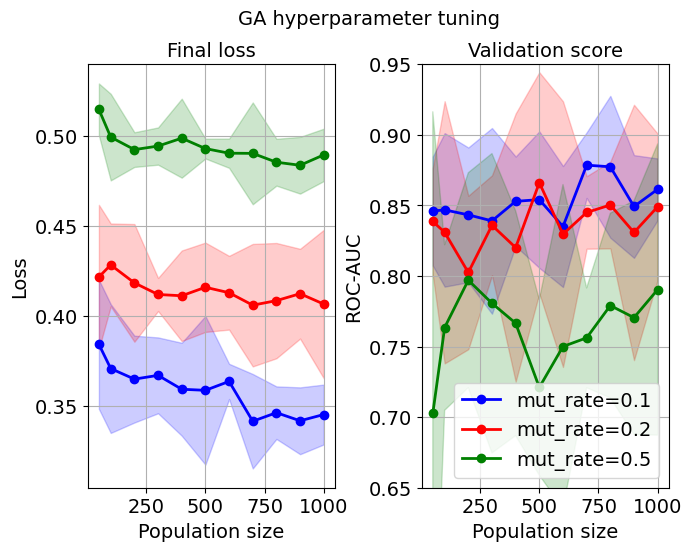

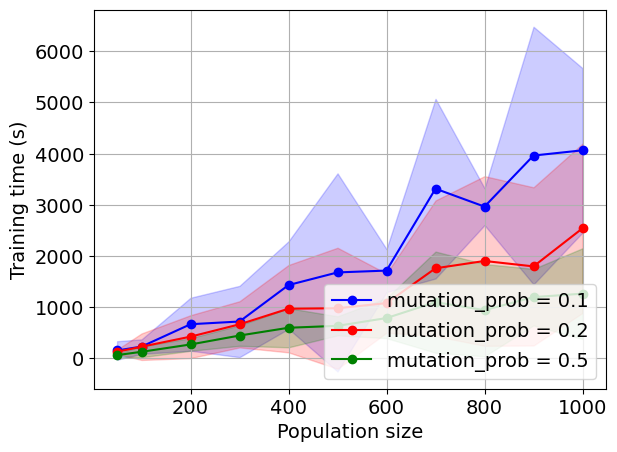

In [56]:
color = ['b', 'r', 'g']

fontsize = 14
fontsize = 14
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(7.5, 5.5))

for m in range(len(prob_fit)):
    
    ax1.plot(pop_size_list, prob_fit_mean_arr[:, m], '-o', label=f'mutation_prob = {prob_fit[m]}', color=color[m], linewidth=2, markersize=6)
    ax1.fill_between(pop_size_list, prob_fit_mean_arr[:, m] - 2*prob_fit_std_arr[:, m], 
                                   prob_fit_mean_arr[:, m] + 2*prob_fit_std_arr[:, m], alpha=0.2, color=color[m])

ax1.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax1.set_xlabel('Population size', fontsize=fontsize) 
ax1.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax1.set_title('Final loss', fontsize=fontsize)
#ax1.legend(fontsize=fontsize)
# Turn on the grid
ax1.grid(True)


for m in range(len(prob_fit)):
    
    ax2.plot(pop_size_list, prob_auc_mean_arr[:, m], '-o', label=f'mut_rate={prob_fit[m]}', color=color[m], linewidth=2, markersize=6)
    ax2.fill_between(pop_size_list, prob_auc_mean_arr[:, m] - 2*prob_auc_std_arr[:, m], 
                                   prob_auc_mean_arr[:, m] + 2*prob_auc_std_arr[:, m], alpha=0.2, color=color[m])

ax2.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax2.set_xlabel('Population size', fontsize=fontsize) 
ax2.set_ylabel('ROC-AUC', fontsize=fontsize)
ax2.set_ylim(0.65, 0.95)
ax2.legend(fontsize=fontsize, loc='lower right')
ax2.set_title('Validation score', fontsize=fontsize)
ax2.set_xticks([250, 500, 750, 1000])
# Turn on the grid
ax2.grid(True)
fig.suptitle('GA hyperparameter tuning', fontsize=fontsize) 
fig.subplots_adjust(wspace=0.35)
fig.savefig('ga_loss_auc.png')
plt.show()
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

for m in range(len(prob_fit)):
    
    ax.plot(pop_size_list, prob_time_mean_arr[:, m], '-o', label=f'mutation_prob = {prob_fit[m]}', color=color[m])
    ax.fill_between(pop_size_list, prob_time_mean_arr[:, m] - 2*prob_time_std_arr[:, m], 
                                   prob_time_mean_arr[:, m] + 2*prob_time_std_arr[:, m], alpha=0.2, color=color[m])

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Population size', fontsize=fontsize) 
ax.set_ylabel('Training time (s)', fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='lower right')
# Turn on the grid
plt.grid(True)
plt.show()
plt.close(fig)


In [21]:
prob_fit_mean_arr[:, 0]

array([0.38425482, 0.37079664, 0.36493038, 0.36702608, 0.35930501,
       0.35870579, 0.36365655, 0.34152448, 0.34627379, 0.34177185,
       0.34525372])

In [22]:
prob_auc_mean_arr[:, 0]

array([0.84599251, 0.84681648, 0.84329588, 0.83902622, 0.8528839 ,
       0.8540824 , 0.83501873, 0.87850187, 0.87734082, 0.84921348,
       0.86142322])

In [54]:
## Learning curves
import importlib
importlib.reload(workers_ga)

seed_list = [1, 2, 3, 4, 5]
learning_rate = 0.1
pop_size = 700
mutation_prob = 0.1
max_iters = 5000
early_stopping = True
max_attempts = 400

training_size_list = list(np.arange(0.05, 1.05, 0.05))

output_file = 'galrncrv'

parameters = []

for training_size in training_size_list:
    for seed in seed_list:
        parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                           X_train, y_train, X_vld, y_vld, output_file, training_size))

print('training_size', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('training_size', 'seed', 'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 22)
    output = p.map(workers_ga.galrncrv, parameters)
    print('Done!')

Done!


In [2]:
df_galrncrv = pd.read_csv('galrncrv_results.txt', sep=' ')
df_galrncrv_mean_scores = df_galrncrv.groupby(['training_size']).mean()
df_galrncrv_std_scores = df_galrncrv.groupby(['training_size']).std()
df_galrncrv_mean_scores

,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
training_size,,,,,,,,,
0.05,3.0,1.000000,0.710562,1.000000,0.652101,1.000000,0.420431,2041.408415,0.000065
0.10,3.0,0.996991,0.700749,0.975000,0.685714,0.946245,0.460119,2189.724538,0.065101
0.15,3.0,0.978512,0.789213,0.895775,0.766387,0.753093,0.519036,2079.848744,0.165881
0.20,3.0,0.953462,0.822509,0.869474,0.779832,0.707551,0.570145,2241.054021,0.233291
0.25,3.0,0.944053,0.817528,0.866102,0.774790,0.719102,0.573647,2517.740153,0.256140
0.30,3.0,0.943422,0.787640,0.838028,0.757983,0.548701,0.337272,2849.347242,0.266301
0.35,3.0,0.920699,0.822097,0.834940,0.766387,0.602475,0.498138,2095.499659,0.303297
0.40,3.0,0.941489,0.824120,0.878307,0.754622,0.748466,0.538984,2717.506509,0.271761
0.45,3.0,0.932724,0.843521,0.853521,0.784874,0.682057,0.582819,2410.323343,0.277676


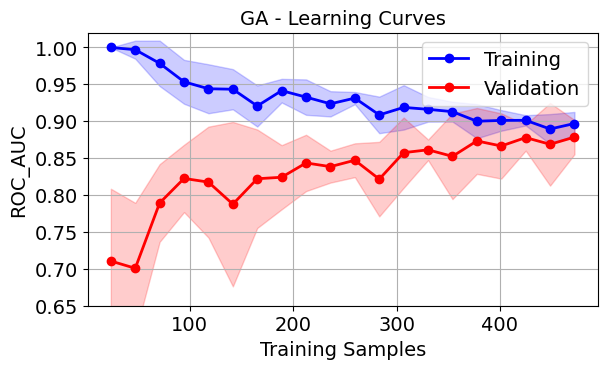

In [61]:
training_size_list = list(np.arange(0.05, 1.05, 0.05))
training_samples = np.array(training_size_list) * X_train.shape[0]

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(training_samples, df_galrncrv_mean_scores['auc_train'], '-o', label='Training', color='b',linewidth=2)
ax.fill_between(training_samples, df_galrncrv_mean_scores['auc_train'] - 2*df_galrncrv_std_scores['auc_train'], 
                                  df_galrncrv_mean_scores['auc_train'] + 2*df_galrncrv_std_scores['auc_train'], alpha=0.2, color="b")

ax.plot(training_samples, df_galrncrv_mean_scores['auc_vld'], '-o', label='Validation', color='r',linewidth=2)
ax.fill_between(training_samples, df_galrncrv_mean_scores['auc_vld'] - 2*df_galrncrv_std_scores['auc_vld'], 
                                  df_galrncrv_mean_scores['auc_vld'] + 2*df_galrncrv_std_scores['auc_vld'], alpha=0.2, color="r")

ax.set_title('GA - Learning Curves', fontsize=fontsize)
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC_AUC', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0.65,1.02)
ax.set_yticks(np.arange(0.65,1.05,0.05))
ax.legend(fontsize=fontsize)
plt.grid(True)
fig.savefig('ga_training_sample.png')
plt.show()
plt.close(fig)

In [8]:
import workers_ga

# Final training 
seed_list = [1, 2, 3, 4, 5]
learning_rate = 0.1
pop_size = 700
mutation_prob = 0.1
max_iters = 5000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'ga_final'

for seed in seed_list:  
    parameters.append((pop_size, mutation_prob, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                                   X_train_full, y_train_full, X_test, y_test, output_file))

print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts', 'seed',
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness', file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_ga.ga_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
ga_final = fitcrv

Done!


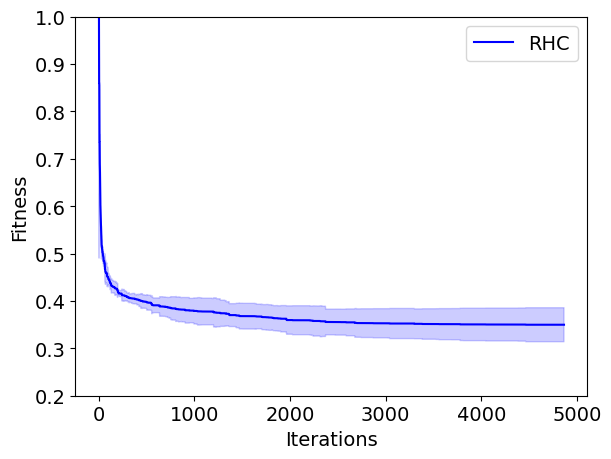

In [9]:
ga_final.to_csv('ga_final_fitness_curve.csv', index=False) 

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(ga_final.shape[0]), ga_final['mean'], label='RHC', color='b')
ax.fill_between(range(ga_final.shape[0]), ga_final['mean'] - 2*ga_final['std'], 
                                          ga_final['mean'] + 2*ga_final['std'], alpha=0.2, color="b")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
plt.show()
plt.close(fig)

In [10]:
df_ga_final = pd.read_csv('ga_final_results.txt', sep=' ')
df_ga_final_mean = df_ga_final.groupby(['pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts']).mean()
df_ga_final_std  = df_ga_final.groupby(['pop_size', 'mutation_prob', 'max_iters', 'learning_rate',  'early_stopping', 'max_attempts']).std()
df_ga_final_mean

,,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
pop_size,mutation_prob,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
700,0.1,5000,0.1,True,400,3.0,0.891512,0.837056,0.805753,0.762992,0.464151,0.38136,3163.889578,0.349773


In [62]:
df_ga_final_std 

,,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
pop_size,mutation_prob,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
700,0.1,5000,0.1,True,400,1.581139,0.01616,0.02082,0.038387,0.018963,0.225883,0.181069,896.387459,0.020054
